<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Portfolio-Optimization-(40-pts)" data-toc-modified-id="Portfolio-Optimization-(40-pts)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Portfolio Optimization (40 pts)</a></span><ul class="toc-item"><li><span><a href="#Using-Brute-Force-Method" data-toc-modified-id="Using-Brute-Force-Method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using Brute Force Method</a></span></li><li><span><a href="#Using-Gradient-Descent-To-Get-Optimal-Weight-For-A-Specific-Sharpe-Ratio" data-toc-modified-id="Using-Gradient-Descent-To-Get-Optimal-Weight-For-A-Specific-Sharpe-Ratio-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Using Gradient Descent To Get Optimal Weight For A Specific Sharpe Ratio</a></span></li></ul></li><li><span><a href="#Control-yfinance-API-Requesting-(30-pts)" data-toc-modified-id="Control-yfinance-API-Requesting-(30-pts)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Control yfinance API Requesting (30 pts)</a></span></li><li><span><a href="#Implementing-a-Risk-Management-Decorator-for-Financial-Transactions-(30-pts)" data-toc-modified-id="Implementing-a-Risk-Management-Decorator-for-Financial-Transactions-(30-pts)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implementing a Risk Management Decorator for Financial Transactions (30 pts)</a></span></li></ul></div>

# Portfolio Optimization (40 pts)

## Using Brute Force Method

* Objective: \
  The primary objective of this assignment is to apply a brute-force search method to identify the   optimal asset allocation for a portfolio that maximizes the Sharpe Ratio.\
  This method involves iterating over a vast number of potential asset weight combinations to evaluate their performance, based on historical return data, and selecting the combination that yields the highest Sharpe Ratio.
  
* Data Preparation: \
  Load the historical price data for each asset in your portfolio.\
  Calculate daily returns from the price data.

* Brute Force Optimization: \
  Generate a large number of random portfolios by assigning different weights to each asset. \
  Ensure that the sum of weights in each portfolio equals 1. \
  For each portfolio, calculate the annualized return, annualized volatility, and the Sharpe Ratio.

* Selection of Optimal Portfolio: \
  Identify the portfolio with the highest Sharpe Ratio. This portfolio is considered the optimal asset allocation.\
  Analyze the risk (volatility) and return of the optimal portfolio.

* Visualization: \
  Plot the risk-return scatter plot for all the generated portfolios to visualize the distribution and identify the efficient frontier visually.

* Highlight the optimal portfolio on the plot.

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
stock = yf.download(["AAPL", "AMZN", "TSLA"],
                    start = "2021-01-01",
                    end = "2022-01-01")

[*********************100%%**********************]  3 of 3 completed


In [5]:
data = stock["Adj Close"]

In [6]:
data

Ticker,AAPL,AMZN,TSLA
Date,,,
2021-01-04,127.002090,159.331497,243.256668
2021-01-05,128.572311,160.925507,245.036667
2021-01-06,124.244370,156.919006,251.993332
2021-01-07,128.483994,158.108002,272.013336
2021-01-08,129.592957,159.134995,293.339996
...,...,...,...
2021-12-27,178.065659,169.669495,364.646667
2021-12-28,177.038712,170.660995,362.823334
2021-12-29,177.127594,169.201004,362.063324


In [7]:
# Calculate returns
simple_returns = data.pct_change().dropna()
print(simple_returns)

# Empty dataframe to store the metrics
data_metrics = pd.DataFrame(columns=['Return', 'Volatility', 'Sharpe Ratio', *data.columns])


for i in range(10000):
    # Generate random weights and make sure their sum is 1
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)

    # There are 252 trading days in the year.
    portfolio_returns = np.dot(simple_returns.mean(), weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(simple_returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_returns / portfolio_volatility

    data_metrics.loc[i] = [portfolio_returns, portfolio_volatility, sharpe_ratio, *weights]

print(data_metrics)

Ticker          AAPL      AMZN      TSLA
Date                                    
2021-01-05  0.012364  0.010004  0.007317
2021-01-06 -0.033662 -0.024897  0.028390
2021-01-07  0.034123  0.007577  0.079447
2021-01-08  0.008631  0.006496  0.078403
2021-01-11 -0.023249 -0.021519 -0.078214
...              ...       ...       ...
2021-12-27  0.022975 -0.008178  0.025248
2021-12-28 -0.005767  0.005844 -0.005000
2021-12-29  0.000502 -0.008555 -0.002095
2021-12-30 -0.006578 -0.003289 -0.014592
2021-12-31 -0.003535 -0.011429 -0.012669

[251 rows x 3 columns]
        Return  Volatility  Sharpe Ratio      AAPL      AMZN      TSLA
0     0.226056    0.222203      1.017342  0.438916  0.497193  0.063891
1     0.342212    0.293780      1.164857  0.364025  0.263813  0.372162
2     0.402114    0.320438      1.254890  0.487943  0.083478  0.428579
3     0.229391    0.264874      0.866039  0.100635  0.614530  0.284835
4     0.263182    0.270624      0.972499  0.181649  0.508703  0.309648
...        ...   

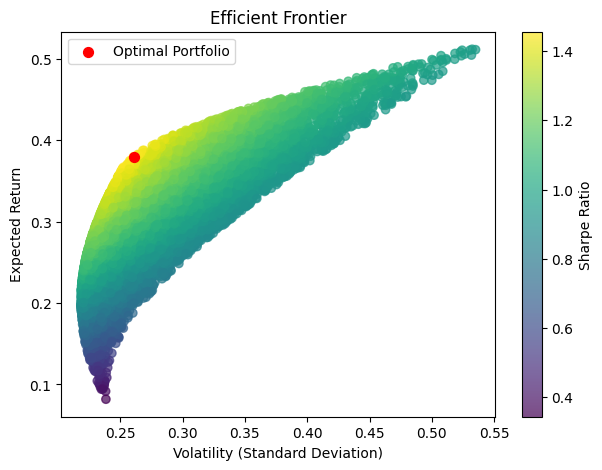

In [8]:
# Find the optimal portfolio (max Sharpe ratio)
optimal_portfolio = data_metrics.iloc[data_metrics['Sharpe Ratio'].idxmax()]

# Plot the heatmap
plt.figure(figsize=(7, 5))
heatmap = plt.scatter(data_metrics['Volatility'], data_metrics['Return'], c=data_metrics['Sharpe Ratio'], cmap='viridis', alpha=0.7)
plt.colorbar(heatmap, label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

# Mark the optimal portfolio
plt.scatter(optimal_portfolio['Volatility'], optimal_portfolio['Return'], color='red', marker='.', s=200, label='Optimal Portfolio')

plt.legend()
plt.show()

## Using Gradient Descent To Get Optimal Weight For A Specific Sharpe Ratio

* Objective: \
  The objective of this assignment is to apply the gradient descent algorithm to find the portfolio weights that achieve a portfolio Sharpe Ratio as close as possible to a specified target value. \
  This involves developing a function that calculates the gradient of the difference between the current portfolio's Sharpe Ratio and the target Sharpe Ratio with respect to the portfolio weights, and then iteratively adjusting the weights to minimize this difference.
  
* Data Preparation: \
  Load the historical price data for the chosen assets.
  Calculate daily returns from the price data.

* Gradient Descent Setup:\ 
  Define the target Sharpe Ratio you aim to achieve with your portfolio. \
  Initialize random weights for each asset in the portfolio, ensuring they sum to 1. \
  Develop a function to calculate the portfolio's Sharpe Ratio given a set of weights and the historical returns data. \
  Implement a function to approximate the gradient of the difference between the current Sharpe Ratio and the target Sharpe Ratio with respect to the weights. This involves numerically estimating how small changes in weights affect the Sharpe Ratio.
  
* Optimization Loop: \
  Apply the gradient descent algorithm: iteratively adjust the portfolio weights in the direction that reduces the difference between the current and target Sharpe Ratios, based on the calculated gradient. \
  Ensure that the portfolio weights remain valid (i.e., they sum to 1 and are non-negative) after each iteration.

* Analysis and Visualization: \
  Analyze the optimized portfolio in terms of its expected return, volatility, and Sharpe Ratio.

In [9]:
# Risk-free rate (assuming 0 for simplification)
R_f = 0

# Target Sharpe Ratio
S_target = 1.0

# Generate random weights and ensure that their sum is 1
weights = np.random.random(len(data.columns))
weights /= np.sum(weights)

# Function to calculate sharpe ratio
def calculate_sharpe_ratio(weights, returns):
    portfolio_returns = np.dot(returns.mean(), weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    if portfolio_volatility == 0:
        sharpe_ratio = 0
    else:
        sharpe_ratio = portfolio_returns / portfolio_volatility
    return sharpe_ratio

# Function to calculate gradients
def calculate_gradients(current_sharpe_ratio, target_sharpe_ratio, weights, returns):
    gradient = np.zeros_like(weights)
    perturbation = np.zeros_like(weights)
    epsilon = 1e-8

    for i in range(len(weights)):
        perturbation[i] = epsilon

        # Calculate sharpe ratio with perturbed weights
        sharpe_ratio_perturbed = calculate_sharpe_ratio(weights + perturbation, returns)

        # Calculate the difference in sharpe ratio
        difference = sharpe_ratio_perturbed - target_sharpe_ratio

        # Approximate the gradient using finite difference
        gradient[i] = (difference / epsilon)

        # Reset perturbation
        perturbation[i] = 0
        
    return gradient

tolerance = 0.01
learning_rate = 0.1

# 100 iterations for gradient descent
for i in range(100):
    # Calculate sharpe ratio and approximate gradients
    current_sharpe_ratio = calculate_sharpe_ratio(weights, simple_returns)
    gradient = calculate_gradients(current_sharpe_ratio, S_target, weights, simple_returns)

     # Normalize gradient
    gradient_magnitude = np.linalg.norm(gradient)
    if gradient_magnitude != 0:
        normalized_gradient = gradient / gradient_magnitude
    else:
        normalized_gradient = gradient

    # Update weights to the opposite direction of the gradient
    weights -= learning_rate * normalized_gradient

    # Ensure weights remain non negative and sum to 1
    weights = np.maximum(weights, 0)
    weights /= np.sum(weights) if np.sum(weights) != 0 else 1

    # Check for convergence
    if abs(current_sharpe_ratio - S_target) < tolerance:
        print(f"Converged after {i + 1} iterations.")
        print(f"Optimized weights: {weights}")
        break

else:
    print("Maximum iterations reached without convergence.")

Converged after 29 iterations.
Optimized weights: [0.12444609 0.04921138 0.82634253]


# Control yfinance API Requesting (30 pts)

* Objective \
  The goal of this assignment is to develop a Python script that incorporates a rate limiter for fetching financial data using the yfinance library. \
  This rate limiter should ensure that the data fetching function does not exceed a specified number of calls within a given timeframe, thus preventing rate limit violations when accessing financial data APIs.
  
* Implement the Rate Limiter: \
  Create a RateLimiter class that initializes with two parameters: max_calls, the maximum number of allowed calls, and period, the timeframe in seconds within which these calls can be made. \
  Implement the class's __call__ method to manage the function wrapping, tracking the timestamps of each call and enforcing the rate limit.

* Create a Data Fetching Function: \
  Write a function fetch_stock_data that takes a stock symbol as input and uses the yfinance library to fetch the last 5 days of historical stock data. \
  Apply the RateLimiter decorator to this function, using a practical rate limit setting (e.g., 5 calls per minute).

* Demonstration and Testing: \
  Demonstrate the use of your rate-limited fetch_stock_data function by fetching data for multiple stock symbols in a loop. \
  Include logic to simulate rapid successive calls and show how the rate limiter manages these calls to comply with the set rate limit.

In [21]:
import time
import yfinance as yf
from _thread import interrupt_main

class RateLimiter:
    def __init__(self, max_calls, period):
        self.max_calls = max_calls
        self.period = period
        self.call_times = []

    def __call__(self, func):
        def wrapper(*args, **kwargs):
            current_time = time.time()
            self.call_times = [t for t in self.call_times if current_time - t <= self.period]
            if len(self.call_times) < self.max_calls:
                self.call_times.append(current_time)
                return func(*args, **kwargs)
            else:
                print("Rate limit exceeded. Please try again later.")
                interrupt_main()
        return wrapper

# Limit calls to 5 per minute
@RateLimiter(max_calls=5, period=60)
def fetch_stock_data(symbol):
    data = yf.download(symbol, period="5d")
    return data

if __name__ == "__main__":
    symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NFLX"]
    for symbol in symbols:
        data = fetch_stock_data(symbol)
        # Print the first few rows of the fetched data
        print(data.head())

        time.sleep(10)  # Sleep to simulate delay between requests

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-01  171.190002  171.250000  169.479996  170.029999  170.029999   
2024-04-02  169.080002  169.339996  168.229996  168.839996  168.839996   
2024-04-03  168.789993  170.679993  168.580002  169.649994  169.649994   
2024-04-04  170.289993  171.919998  168.820007  168.820007  168.820007   
2024-04-05  169.589996  170.389999  168.949997  169.580002  169.580002   

              Volume  
Date                  
2024-04-01  46240500  
2024-04-02  49329500  
2024-04-03  47602100  
2024-04-04  53704400  
2024-04-05  42055200  


[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-01  423.950012  427.890015  422.220001  424.570007  424.570007   
2024-04-02  420.109985  422.380005  417.839996  421.440002  421.440002   
2024-04-03  419.730011  423.260010  419.089996  420.450012  420.450012   
2024-04-04  424.989990  428.670013  417.570007  417.880005  417.880005   
2024-04-05  420.010010  426.510010  418.320007  425.519989  425.519989   

              Volume  
Date                  
2024-04-01  16316000  
2024-04-02  17912000  
2024-04-03  16475600  
2024-04-04  19370900  
2024-04-05  16544300  


[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-01  150.690002  155.740005  150.610001  155.490005  155.490005   
2024-04-02  153.500000  154.699997  152.149994  154.559998  154.559998   
2024-04-03  153.600006  155.080002  152.729996  154.919998  154.919998   
2024-04-04  153.500000  154.770004  150.449997  150.529999  150.529999   
2024-04-05  150.029999  153.419998  149.600006  152.500000  152.500000   

              Volume  
Date                  
2024-04-01  31730800  
2024-04-02  24586000  
2024-04-03  24655700  
2024-04-04  34724700  
2024-04-05  23449300  


[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-01  180.789993  183.000000  179.949997  180.970001  180.970001   
2024-04-02  179.070007  180.789993  178.380005  180.690002  180.690002   
2024-04-03  179.899994  182.869995  179.800003  182.410004  182.410004   
2024-04-04  184.000000  185.100006  180.000000  180.000000  180.000000   
2024-04-05  182.380005  186.270004  181.970001  185.070007  185.070007   

              Volume  
Date                  
2024-04-01  29174500  
2024-04-02  32611500  
2024-04-03  30959800  
2024-04-04  41624300  
2024-04-05  42335200  


[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-01  487.200012  497.429993  481.779999  491.350006  491.350006   
2024-04-02  485.100006  497.529999  484.649994  497.369995  497.369995   
2024-04-03  498.929993  507.239990  498.750000  506.739990  506.739990   
2024-04-04  516.419983  530.000000  510.579987  510.920013  510.920013   
2024-04-05  516.859985  530.700012  514.409973  527.340027  527.340027   

              Volume  
Date                  
2024-04-01   9247000  
2024-04-02  11081000  
2024-04-03  12047100  
2024-04-04  26476300  
2024-04-05  19242000  
Rate limit exceeded. Please try again later.


KeyboardInterrupt: 

# Implementing a Risk Management Decorator for Financial Transactions (30 pts)

* Objective \
  The objective of this assignment is to create a Python script that uses a function decorator to enforce risk management rules on financial transactions. \ 
  This decorator should be capable of assessing transactions based on predefined risk criteria (e.g., maximum allowable transaction size, leverage limits) and either approve the transaction, modify it to fit within the risk parameters, or reject it outright.
  
* Define Risk Management Criteria: \
  Identify and clearly define a set of risk management criteria to be applied to transactions. Example criteria might include maximum transaction size, maximum leverage, or maximum exposure to a single asset. \

* Implement the Risk Management Decorator: \
  Develop a decorator, risk_management, that can wrap any function initiating a financial transaction. \
  The decorator should check the transaction details against the predefined risk criteria and decide to: \
  Approve the transaction as is. \
  Modify the transaction to fit within risk limits. \
  Reject the transaction if it cannot be safely modified. \
  Include logging within the decorator to record the decision made for each transaction (approved, modified, rejected).
  (Tips: import logging)
  
* Transaction Function: \
  Write a function, execute_transaction, that simulates executing a financial transaction. This function should accept parameters such as transaction size, asset, and leverage. \
  Apply the risk_management decorator to this function.

* Demonstration and Testing: \
  Demonstrate the use of your decorated execute_transaction function by simulating a variety of transaction scenarios that test each of your risk management criteria. \
  Provide examples where transactions are approved, modified, and rejected based on the criteria. 



In [15]:
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define Risk Management Criteria
MAX_TRANSACTION_SIZE = 50000
MAX_LEVERAGE = 4
MAX_EXPOSURE_PER_ASSET = 0.2

# Implement the Risk Management Decorator
def risk_management(func):
    def wrapper(*args, **kwargs):
        global account_balance  # Access the account balance
        transaction_size = kwargs.get('transaction_size')
        leverage = kwargs.get('leverage', 1)
        asset = kwargs.get('asset')
        transaction_result = 'Failure'
        return_value = None

        # Check transaction size
        if transaction_size > MAX_TRANSACTION_SIZE:
            logging.info(f"Transaction rejected: Transaction size exceeds maximum allowable size.")
        # Check leverage
        elif leverage > MAX_LEVERAGE:
            logging.info(f"Transaction rejected: Leverage exceeds maximum allowable limit.")
        else:
            # Calculate exposure to a single asset
            exposure = transaction_size * leverage

            # Check exposure to a single asset
            if exposure > MAX_EXPOSURE_PER_ASSET * account_balance:
                max_exposure = MAX_EXPOSURE_PER_ASSET * account_balance
                max_transaction_size = max_exposure / leverage
                logging.info(f"Transaction modified: Exposure to {asset} exceeds maximum allowable limit. Modifying transaction size to fit within risk limits.")
                kwargs['transaction_size'] = max_transaction_size
            
            logging.info("Transaction approved.")
            return_value = func(*args, **kwargs)
            transaction_result = 'Success'
        print(f"Transaction result: {transaction_result}")
        return return_value
    return wrapper

# Transaction Function
@risk_management
def execute_transaction(transaction_size, asset, leverage=1):
    logging.info(f"Executing transaction: Size - {transaction_size}, Asset - {asset}, Leverage - {leverage}")

# Demonstration and Testing
account_balance = 100000  # Account balance
# Test transactions
execute_transaction(transaction_size=30000, asset='AMZN', leverage=3)
execute_transaction(transaction_size=5000, asset='AAPL', leverage=2)
execute_transaction(transaction_size=15000, asset='GOOGL', leverage=3)
execute_transaction(transaction_size=60000, asset='META', leverage=3)
execute_transaction(transaction_size=8000, asset='MSFT', leverage=6)

2024-04-07 16:17:24,183 - INFO - Transaction modified: Exposure to AMZN exceeds maximum allowable limit. Modifying transaction size to fit within risk limits.
2024-04-07 16:17:24,184 - INFO - Transaction approved.
2024-04-07 16:17:24,184 - INFO - Executing transaction: Size - 6666.666666666667, Asset - AMZN, Leverage - 3
2024-04-07 16:17:24,184 - INFO - Transaction approved.
2024-04-07 16:17:24,185 - INFO - Executing transaction: Size - 5000, Asset - AAPL, Leverage - 2
2024-04-07 16:17:24,185 - INFO - Transaction modified: Exposure to GOOGL exceeds maximum allowable limit. Modifying transaction size to fit within risk limits.
2024-04-07 16:17:24,185 - INFO - Transaction approved.
2024-04-07 16:17:24,185 - INFO - Executing transaction: Size - 6666.666666666667, Asset - GOOGL, Leverage - 3
2024-04-07 16:17:24,185 - INFO - Transaction rejected: Transaction size exceeds maximum allowable size.
2024-04-07 16:17:24,185 - INFO - Transaction rejected: Leverage exceeds maximum allowable limit.


Transaction result: Success
Transaction result: Success
Transaction result: Success
Transaction result: Failure
Transaction result: Failure
